### Making some interesting graphics from the DfT road safety accident data

This is an exploratory analysis of accident data from https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data. I make several graphics during this notebook, but the final image 'UK accidents 2010-2017 over time' reveals the most about this dataset

In [1]:
import datashader as ds
import pandas as pd
from colorcet import fire
from datashader import transfer_functions as tf
from datashader.utils import export_image
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

In [2]:
accidents_2017 = pd.read_csv("DfTRoadSafety_Accidents_2017.csv")
accidents_2016 = pd.read_csv("DfTRoadSafety_Accidents_2016.csv")
accidents_2015 = pd.read_csv("DfTRoadSafety_Accidents_2015.csv")
accidents_2014 = pd.read_csv("DfTRoadSafety_Accidents_2014.csv")
accidents_2013 = pd.read_csv("DfTRoadSafety_Accidents_2013.csv")
accidents_2012 = pd.read_csv("DfTRoadSafety_Accidents_2012.csv")
accidents_2011 = pd.read_csv("DfTRoadSafety_Accidents_2011.csv")
accidents_2010 = pd.read_csv("DfTRoadSafety_Accidents_2010.csv")

/Users/rmartinshort/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/rmartinshort/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
all_accidents_since_2010 = pd.concat([accidents_2017,accidents_2016,accidents_2015,accidents_2014,accidents_2013
            ,accidents_2012,accidents_2011,accidents_2010])

In [7]:
all_accidents_since_2010.head()
all_accidents_since_2010.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

### What is the total size of this dataframe in Mb?

In [10]:
all_accidents_since_2010.memory_usage(index=True).sum()/1e6

301.7784

#### Some exploratory plots 

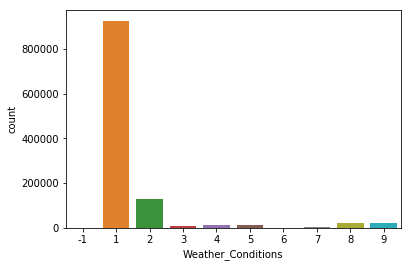

In [13]:
sns.countplot(all_accidents_since_2010['Weather_Conditions'])

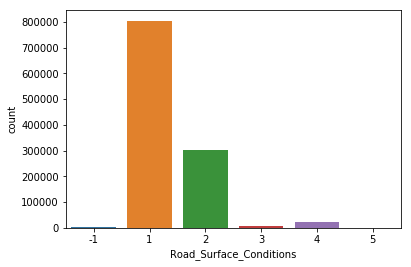

In [14]:
sns.countplot(all_accidents_since_2010['Road_Surface_Conditions'])

#### Check number of nulls

In [16]:
all_accidents_since_2010.isna().sum()

Accident_Index                                     0
Location_Easting_OSGR                             53
Location_Northing_OSGR                            53
Longitude                                         63
Latitude                                          63
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                              56
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                       37
Junction_Detail                               

In [23]:
len(all_accidents_since_2010)/1e6 # <- 1.14 million accidents

1.1431

### Plot a map of the accident locations

In [4]:
locations = all_accidents_since_2010[['Longitude','Latitude']]

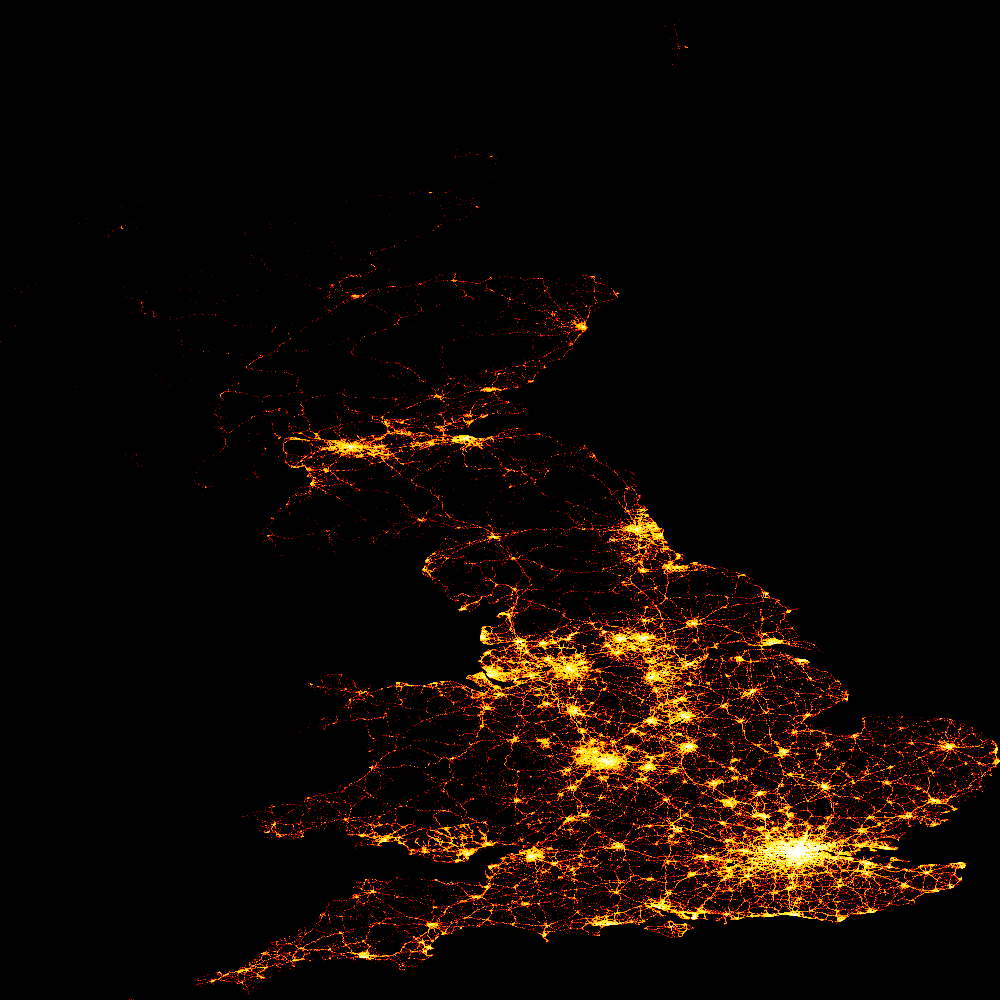

In [15]:
agg = ds.Canvas(plot_width=1000, plot_height=1000).points(locations, 'Longitude', 'Latitude')
img = tf.set_background(tf.shade(agg, cmap=fire),"black")
export_image(img=img,filename='UK_accidents_map', fmt=".png")

### Grouping by week and then finding mean
We want a matrix for which each column is an hour of a day and each row is a week

In [7]:
all_accidents_since_2010.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,...,0,0,4,1,1,0,0,1,1,E01001450
1,2017010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,01/01/2017,...,0,0,4,1,2,0,0,1,1,E01004702
2,2017010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,01/01/2017,...,0,0,4,1,1,0,0,1,1,E01004298
3,2017010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,1,01/01/2017,...,0,4,4,2,2,0,0,1,1,E01001429
4,2017010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,1,01/01/2017,...,0,5,4,1,2,0,0,1,1,E01001808


In [8]:
dates_times = all_accidents_since_2010[['Date','Day_of_Week','Time','Accident_Severity']]

In [9]:
dates_times.sort_values(['Date','Day_of_Week','Time'],inplace=True)

/Users/rmartinshort/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Make a plot of accident severity as a function of day of week

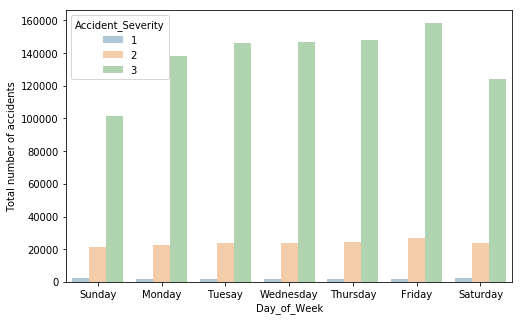

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='Day_of_Week',data=dates_times,alpha=0.4,hue='Accident_Severity')
plt.ylabel('Total number of accidents')
plt.xticks(np.arange(0,7),['Sunday','Monday','Tuesay','Wednesday','Thursday','Friday','Saturday'])
plt.savefig("Accident_counts.pdf",dpi=100)

### Convert date column to DateTime object

In [12]:
times = pd.DatetimeIndex(dates_times['Date'] + ' ' + dates_times['Time'])

In [13]:
dates_times['timestamp'] = times

/Users/rmartinshort/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
dates_times.set_index('timestamp',inplace=True)

In [17]:
dates_times.head()

,Date,Day_of_Week,Time,Accident_Severity
timestamp,,,,
2010-01-01 00:01:00,01/01/2010,6,00:01,2
2010-01-01 00:01:00,01/01/2010,6,00:01,3
2010-01-01 00:05:00,01/01/2010,6,00:05,3
2010-01-01 00:23:00,01/01/2010,6,00:23,3
2010-01-01 00:24:00,01/01/2010,6,00:24,3


In [18]:
#get the number of events for each hour
events_per_hour = dates_times['Day_of_Week'].resample('H', how='count')

/Users/rmartinshort/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  


In [19]:
events_per_hour.head()

timestamp
2010-01-01 00:00:00    16
2010-01-01 01:00:00    21
2010-01-01 02:00:00    23
2010-01-01 03:00:00    16
2010-01-01 04:00:00    11
Name: Day_of_Week, dtype: int64

In [20]:
#This is to check that there is consistently a gap of 1 hour
res = (pd.Series(events_per_hour.index[1:]) - pd.Series(events_per_hour.index[:-1])).value_counts()

01:00:00    70127
Name: timestamp, dtype: int64

### Generate a matrix of accident counts as a function of hour of week and week of year

In [22]:
A = np.zeros([len(events_per_hour)//(24*7),(24*7)]) #will be number of weeks by number of hours in week

In [23]:
j = 0
for i in range(len(events_per_hour)//(24*7)):
    lower_bound = i*168
    upper_bound = (i+1)*168
    A[j,:] = events_per_hour[lower_bound:upper_bound].values
    j += 1

### Display of accidents over time

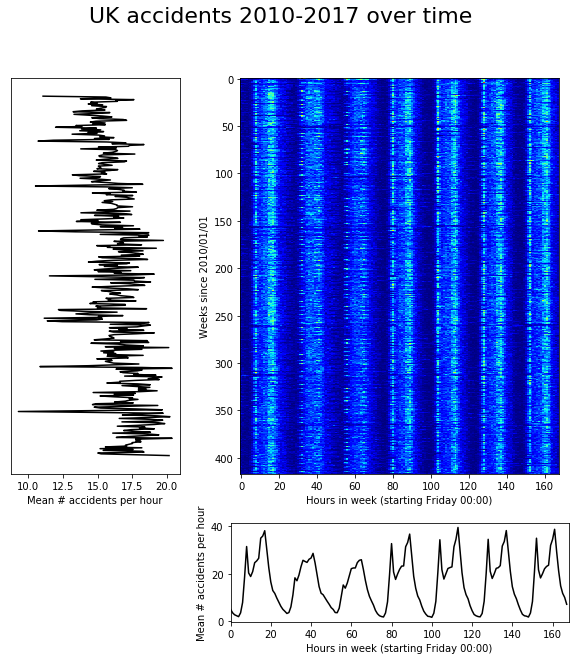

In [63]:
fig = plt.figure(figsize=(10, 10))
gs = plt.GridSpec(2, 2,
                       width_ratios=[1, 2],
                       height_ratios=[4, 1]

                 )

#Mean across weeks
ax1 = plt.subplot(gs[0],yticks=[])
ax1.plot(np.mean(A,axis=1),np.arange(len(A[:,0])),'k-')
ax1.set_xlabel('Mean # accidents per hour')


#The matrix of accident numbers
ax2 = plt.subplot(gs[1])
ax2.imshow(A,aspect=0.5,cmap='jet')
ax2.set_xlabel('Hours in week (starting Friday 00:00)')
ax2.set_ylabel('Weeks since 2010/01/01')

#Mean across hours
ax4 = plt.subplot(gs[3])
ax4.set_xlabel('Hours in week (starting Friday 00:00)')
ax4.set_ylabel('Mean # accidents per hour')
ax4.set_xlim([0,168])
ax4.plot(np.mean(A,axis=0),'k-')

fig.suptitle("UK accidents 2010-2017 over time",fontsize=22)
plt.savefig("Accidents_over_time.pdf",dpi=100)